In [97]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load the long format df

In [98]:
df_long = pd.read_csv('datasets/NPAS_parsed_trunc_long_missing.csv')

df_long.head()

,subject_id,variable,value
0,1,education,4.0
1,2,education,3.0
2,5,education,2.0
3,6,education,2.0
4,7,education,2.0


In [99]:
df_long.sort_values(by=['subject_id','variable']).head()

,subject_id,variable,value
41084,0,academic_over_social,5.0
54994,0,anxious,1.0
20219,0,bookish,5.0
18828,0,books_over_parties,5.0
46648,0,calm,7.0


In [100]:
print(df_long.shape)

(70295, 3)


# Normal pivot

In [101]:
df_wide = df_long.pivot(index='subject_id', columns='variable', values='value')
df_wide.head()

variable,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,dependable,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
subject_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,None,1.0,5.0,5.0,7.0,5.0,1.0,1.0,7.0,...,None,7.0,5.0,5.0,7.0,None,None,5.0,5.0,3.0
1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,5.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,3.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,5.0,None,4.0,4.0,5.0,7.0,5.0,1.0,2.0,7.0,...,None,2.0,5.0,5.0,6.0,None,None,5.0,5.0,4.0
4,4.0,None,3.0,5.0,5.0,6.0,4.0,2.0,5.0,4.0,...,None,6.0,0.0,5.0,5.0,None,None,5.0,4.0,1.0


In [102]:
df_wide.columns

Index([u'academic_over_social', u'age', u'anxious', u'bookish',
       u'books_over_parties', u'calm', u'collect_books', u'conventional',
       u'critical', u'dependable', u'diagnosed_autistic', u'disorganized',
       u'education', u'engnat', u'enjoy_learning', u'excited_about_research',
       u'extraverted', u'familysize', u'gender', u'hand',
       u'hobbies_over_people', u'in_advanced_classes',
       u'intelligence_over_appearance', u'interested_science',
       u'introspective', u'libraries_over_publicspace', u'like_dry_topics',
       u'like_hard_material', u'like_science_fiction', u'like_superheroes',
       u'major', u'married', u'online_over_inperson', u'opennness',
       u'play_many_videogames', u'playes_rpgs', u'prefer_fictional_people',
       u'race_arab', u'race_asian', u'race_black', u'race_hispanic',
       u'race_native_american', u'race_native_austrailian', u'race_nerdy',
       u'race_white', u'read_tech_reports', u'religion', u'reserved',
       u'socially_awkwa

In [103]:
df_wide.columns.name

'variable'

In [104]:
df_wide.columns.name = None
df_wide.head()

,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,dependable,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
subject_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,None,1.0,5.0,5.0,7.0,5.0,1.0,1.0,7.0,...,None,7.0,5.0,5.0,7.0,None,None,5.0,5.0,3.0
1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,5.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,3.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,5.0,None,4.0,4.0,5.0,7.0,5.0,1.0,2.0,7.0,...,None,2.0,5.0,5.0,6.0,None,None,5.0,5.0,4.0
4,4.0,None,3.0,5.0,5.0,6.0,4.0,2.0,5.0,4.0,...,None,6.0,0.0,5.0,5.0,None,None,5.0,4.0,1.0


In [105]:
df_wide.head()

,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,dependable,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
subject_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,None,1.0,5.0,5.0,7.0,5.0,1.0,1.0,7.0,...,None,7.0,5.0,5.0,7.0,None,None,5.0,5.0,3.0
1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,5.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,3.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,5.0,None,4.0,4.0,5.0,7.0,5.0,1.0,2.0,7.0,...,None,2.0,5.0,5.0,6.0,None,None,5.0,5.0,4.0
4,4.0,None,3.0,5.0,5.0,6.0,4.0,2.0,5.0,4.0,...,None,6.0,0.0,5.0,5.0,None,None,5.0,4.0,1.0


In [106]:
print(df_wide.shape)
print(df_wide.shape[0]*df_wide.shape[1])

(1391, 56)
77896


In [108]:
# This is a way to remove the name of the index
# df_wide.index.name = None

In [109]:
df_wide = df_wide.reset_index()
df_wide.head()

,subject_id,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
0,0,5.0,None,1.0,5.0,5.0,7.0,5.0,1.0,1.0,...,None,7.0,5.0,5.0,7.0,None,None,5.0,5.0,3.0
1,1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,3,5.0,None,4.0,4.0,5.0,7.0,5.0,1.0,2.0,...,None,2.0,5.0,5.0,6.0,None,None,5.0,5.0,4.0
4,4,4.0,None,3.0,5.0,5.0,6.0,4.0,2.0,5.0,...,None,6.0,0.0,5.0,5.0,None,None,5.0,4.0,1.0


# Pivot table - pivot + aggregation functions

In [111]:
values = []
for year in [2012,2013,2014,2015]:
    for quarter in [1,2,3,4]:
        for month in range(1,12+1):
            values.append([year,quarter,month,np.random.randint(50,150),np.random.randint(300,500)])

df = pd.DataFrame(values, columns = ['year','quarter','month','sales','new_customers'])
df.head()

,year,quarter,month,sales,new_customers
0,2012,1,1,65,484
1,2012,1,2,70,439
2,2012,1,3,60,350
3,2012,1,4,85,408
4,2012,1,5,102,450


In [112]:
pd.pivot_table(df, values='sales', index=['year'], columns=['quarter'], aggfunc=np.sum)

quarter,1,2,3,4
year,,,,
2012,995,1323,1245,1360
2013,1253,1081,1159,1268
2014,1185,1266,1305,1290
2015,1308,1173,1340,1359


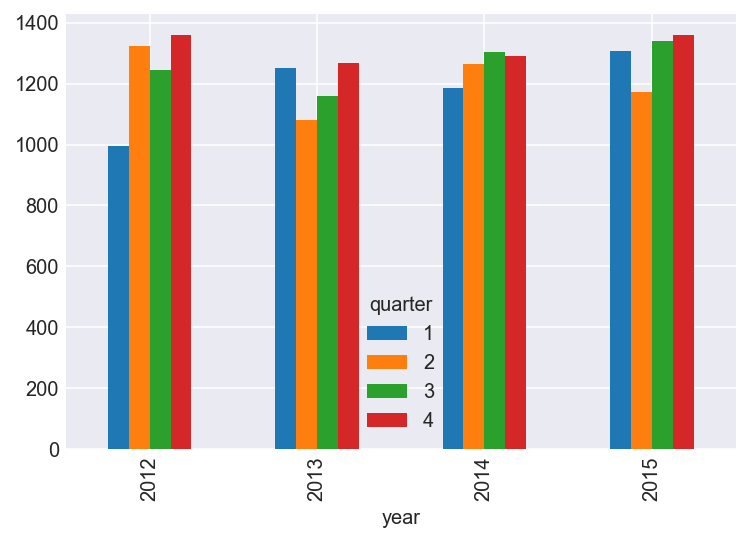

In [114]:
pd.pivot_table(df, 
               values='sales', 
               index=['year'], 
               columns=['quarter'], 
               aggfunc=np.sum).plot(kind='bar')

In [120]:
df_pivot_sum_mean = pd.pivot_table(df, values='sales', index=['year'], columns=['quarter'], aggfunc=[np.mean,np.sum])
df_pivot_sum_mean

mean                                       sum              \
quarter           1           2           3           4     1     2     3   
year                                                                        
2012      82.916667  110.250000  103.750000  113.333333   995  1323  1245   
2013     104.416667   90.083333   96.583333  105.666667  1253  1081  1159   
2014      98.750000  105.500000  108.750000  107.500000  1185  1266  1305   
2015     109.000000   97.750000  111.666667  113.250000  1308  1173  1340   

               
quarter     4  
year           
2012     1360  
2013     1268  
2014     1290  
2015     1359

#### We have two levels in the column names

In [124]:
df_pivot_sum_mean['mean']

quarter,1,2,3,4
year,,,,
2012,82.916667,110.250000,103.750000,113.333333
2013,104.416667,90.083333,96.583333,105.666667
2014,98.750000,105.500000,108.750000,107.500000
2015,109.000000,97.750000,111.666667,113.250000


In [125]:
df_pivot_sum_mean['mean',1]

year
2012     82.916667
2013    104.416667
2014     98.750000
2015    109.000000
Name: (mean, 1), dtype: float64

You can rename the columns to have a single level

In [116]:
df_pivot_sum_mean.columns

MultiIndex(levels=[[u'mean', u'sum'], [1, 2, 3, 4]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
           names=[None, u'quarter'])

In [117]:
# a dumb approach
new_cols = ['{}_{}'.format(l0,l1) for l0 in df_pivot_sum_mean.columns.levels[0] for l1 in df_pivot_sum_mean.columns.levels[1]]
new_cols

['mean_1', 'mean_2', 'mean_3', 'mean_4', 'sum_1', 'sum_2', 'sum_3', 'sum_4']

In [118]:
df_pivot_sum_mean.columns = new_cols
df_pivot_sum_mean

,mean_1,mean_2,mean_3,mean_4,sum_1,sum_2,sum_3,sum_4
year,,,,,,,,
2012,82.916667,110.250000,103.750000,113.333333,995,1323,1245,1360
2013,104.416667,90.083333,96.583333,105.666667,1253,1081,1159,1268
2014,98.750000,105.500000,108.750000,107.500000,1185,1266,1305,1290
2015,109.000000,97.750000,111.666667,113.250000,1308,1173,1340,1359


#### We can create a pivot table using two values

In [75]:
pd.pivot_table(df, 
               values=['sales','new_customers'], 
               index=['year'], 
               columns=['quarter'], 
               aggfunc=np.sum)

new_customers                   sales                  
quarter             1     2     3     4     1     2     3     4
year                                                           
2012             4770  4779  4730  5036  1064  1071  1248  1136
2013             4444  4675  4825  5114  1172  1188  1299  1243
2014             4815  4902  4904  4745  1185  1138  1384  1303
2015             4852  5045  4730  4600  1120  1065  1090  1172

#### We can create a pivot table using two values and two functions

In [77]:
pd.pivot_table(df, 
               values=['sales','new_customers'], 
               index=['year'], 
               columns=['quarter'], 
               aggfunc=[np.mean,np.median])

mean                                                 \
        new_customers                                          sales   
quarter             1           2           3           4          1   
year                                                                   
2012       397.500000  398.250000  394.166667  419.666667  88.666667   
2013       370.333333  389.583333  402.083333  426.166667  97.666667   
2014       401.250000  408.500000  408.666667  395.416667  98.750000   
2015       404.333333  420.416667  394.166667  383.333333  93.333333   

                                                  median                       \
                                           new_customers                        
quarter          2           3           4             1      2      3      4   
year                                                                            
2012     89.250000  104.000000   94.666667         386.5  408.5  407.0  433.0   
2013     99.000000  108.250000  103.583333         358.5  391.0  411.0  427.0   
2014     94.833333  115.333333  108.583333         411.5  398.0  395.0  393.0   
2015     88.750000   90.833333   97.666667         419.0  435.5  404.0  351.5   

                                     
         sales                       
quarter      1      2      3      4  
year                                 
2012      87.0   82.0  100.0   96.5  
2013      97.0  103.5  118.5   94.0  
2014     106.0   91.5  121.0  112.0  
2015      94.0   83.0   82.0  107.5

#### A smarter way of dealing with multi-level columns

In [128]:
pd.DataFrame(pd.pivot_table(df, 
               values=['sales','new_customers'], 
               index=['year'], 
               columns=['quarter'], 
               aggfunc=[np.mean,np.median]).to_records())

,year,"('mean', 'new_customers', 1)","('mean', 'new_customers', 2)","('mean', 'new_customers', 3)","('mean', 'new_customers', 4)","('mean', 'sales', 1)","('mean', 'sales', 2)","('mean', 'sales', 3)","('mean', 'sales', 4)","('median', 'new_customers', 1)","('median', 'new_customers', 2)","('median', 'new_customers', 3)","('median', 'new_customers', 4)","('median', 'sales', 1)","('median', 'sales', 2)","('median', 'sales', 3)","('median', 'sales', 4)"
0,2012,410.666667,409.750000,417.500000,391.916667,82.916667,110.250000,103.750000,113.333333,421.5,412.0,438.0,388.0,81.0,110.0,106.0,124.0
1,2013,360.916667,384.166667,409.083333,401.666667,104.416667,90.083333,96.583333,105.666667,350.5,369.5,428.5,407.5,105.0,88.5,107.5,113.5
2,2014,402.666667,409.000000,407.416667,376.750000,98.750000,105.500000,108.750000,107.500000,412.5,430.5,427.0,370.0,102.0,116.5,111.0,99.0
3,2015,388.416667,406.833333,394.416667,353.416667,109.000000,97.750000,111.666667,113.250000,373.0,414.5,399.0,342.0,118.5,105.0,111.5,114.0


# Melting - the opposite of pivot 
(i.e. from wide format to long format)

In [126]:
df_wide.head()

,subject_id,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
0,0,5.0,None,1.0,5.0,5.0,7.0,5.0,1.0,1.0,...,None,7.0,5.0,5.0,7.0,None,None,5.0,5.0,3.0
1,1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,3,5.0,None,4.0,4.0,5.0,7.0,5.0,1.0,2.0,...,None,2.0,5.0,5.0,6.0,None,None,5.0,5.0,4.0
4,4,4.0,None,3.0,5.0,5.0,6.0,4.0,2.0,5.0,...,None,6.0,0.0,5.0,5.0,None,None,5.0,4.0,1.0


In [127]:
df_wide.melt(id_vars=['subject_id']).head()

,subject_id,variable,value
0,0,academic_over_social,5.0
1,1,academic_over_social,2.0
2,2,academic_over_social,5.0
3,3,academic_over_social,5.0
4,4,academic_over_social,4.0
